Totalt datapunkter: 600

Antal punkter ovanför varje linje:
 yx    302
fx    301
gx    301
hx    302

Procent ovanför varje linje:
 yx    50.33
fx    50.17
gx    50.17
hx    50.33

Antal punkter som klassificeras annorlunda jämfört med y(x):
 yx      0
fx      1
gx      1
hx    594

Procent olika jämfört med y(x):
 yx     0.00
fx     0.17
gx     0.17
hx    99.00


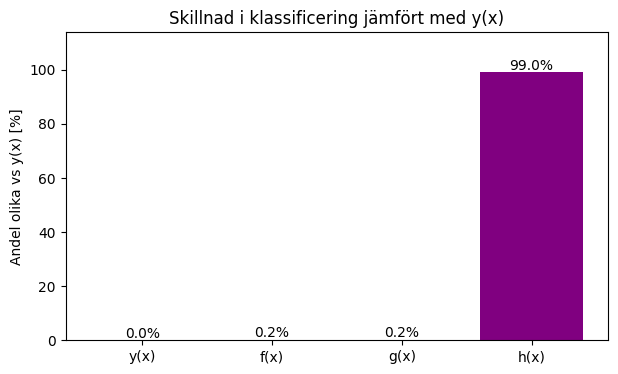

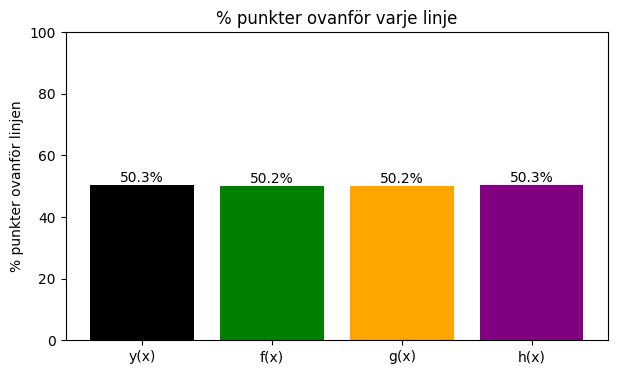


Exempel (upp till 10) på punkter där någon linje avviker från y(x):
        x         y  yx  fx  gx  hx
-1.885908 -1.997408   0   0   0   1
 2.090362  2.562490   1   1   1   0
-2.928221  0.082387   0   0   0   1
 2.895800  2.435458   1   1   1   0
-2.358964 -1.038429   0   0   0   1
-2.932220 -1.766313   0   0   0   1
 1.749034  3.169330   1   1   1   0
 2.312923  0.494256   1   1   1   0
 2.791891  3.856707   1   1   1   0
 2.980068  2.505682   1   1   1   0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Läs in data ---
filename = "unlabelled_data.csv"
df = pd.read_csv(filename, header=None)

# Om filen har fler än 2 kolumner tar vi bara de första två
df = df.iloc[:, :2]
df.columns = ['x', 'y']

# --- Vektoriserad klassificering (inga prints per rad) ---
df['yx'] = (df['y'] >= (-1) * df['x'] + 0).astype(int)         # y = -x
df['fx'] = (df['y'] >= (-0.489) * df['x'] + 0).astype(int)     # f(x) = -0.489x
df['gx'] = (df['y'] >= (-2) * df['x'] + 0.16).astype(int)      # g(x) = -2x + 0.16
df['hx'] = (df['y'] >= (800) * df['x'] - 120).astype(int)      # h(x) = 800x - 120

# --- Statistik ---
total = len(df)
above_counts = df[['yx','fx','gx','hx']].sum()
above_pct = above_counts / total * 100

# Antal/procent som skiljer sig jämfört med y(x)
diffs_counts = df[['yx','fx','gx','hx']].ne(df['yx'], axis=0).sum()  # jämför kolumner mot yx
diffs_pct = diffs_counts / total * 100
diffs_pct['yx'] = 0.0  # självt jämfört = 0%

# --- Utskrift (kort sammanfattning) ---
print("Totalt datapunkter:", total)
print("\nAntal punkter ovanför varje linje:\n", above_counts.to_string())
print("\nProcent ovanför varje linje:\n", above_pct.round(2).to_string())
print("\nAntal punkter som klassificeras annorlunda jämfört med y(x):\n", diffs_counts.to_string())
print("\nProcent olika jämfört med y(x):\n", diffs_pct.round(2).to_string())

# --- Stapeldiagram: skillnad mot y(x) (inkluderar y(x) som 0%) ---
names = ['y(x)', 'f(x)', 'g(x)', 'h(x)']
vals_diff = [diffs_pct['yx'], diffs_pct['fx'], diffs_pct['gx'], diffs_pct['hx']]
colors = ['black', 'green', 'orange', 'purple']

plt.figure(figsize=(7,4))
bars = plt.bar(names, vals_diff, color=colors)
plt.ylim(0, max(100, max(vals_diff)*1.15))
plt.ylabel('Andel olika vs y(x) [%]')
plt.title('Skillnad i klassificering jämfört med y(x)')
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}%", ha='center')
plt.show()

# --- Stapeldiagram: procent ovanför varje linje ---
vals_above = [above_pct['yx'], above_pct['fx'], above_pct['gx'], above_pct['hx']]
plt.figure(figsize=(7,4))
bars = plt.bar(names, vals_above, color=colors)
plt.ylim(0,100)
plt.ylabel('% punkter ovanför linjen')
plt.title('% punkter ovanför varje linje')
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}%", ha='center')
plt.show()

# --- Visa exempel på punkter där någon linje avviker från y(x) ---
diff_mask = (df['fx'] != df['yx']) | (df['gx'] != df['yx']) | (df['hx'] != df['yx'])
if diff_mask.any():
    print("\nExempel (upp till 10) på punkter där någon linje avviker från y(x):")
    print(df.loc[diff_mask, ['x','y','yx','fx','gx','hx']].head(10).to_string(index=False))
else:
    print("\nInga punkter avvek från y(x).")



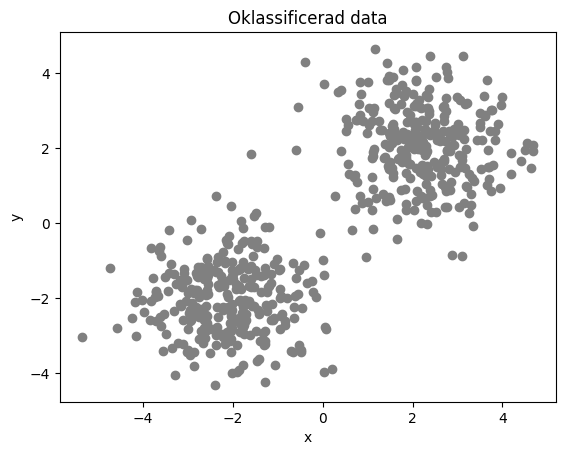

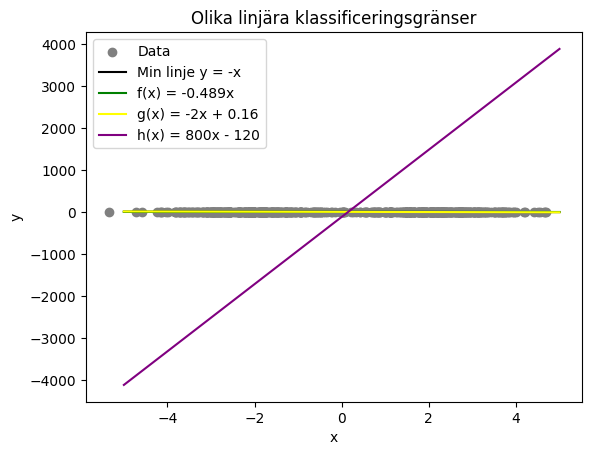

          x         y  my_label  f_label  g_label  h_label
0  2.090362  2.562490         1        1        1        0
1 -2.928221  0.082387         0        0        0        1
2  2.895800  2.435458         1        1        1        0
3 -2.358964 -1.038429         0        0        0        1
4 -2.932220 -1.766313         0        0        0        1
Skillnader mellan min linje och f_line: 1
Skillnader mellan min linje och g_line: 1
Skillnader mellan min linje och h_line: 593


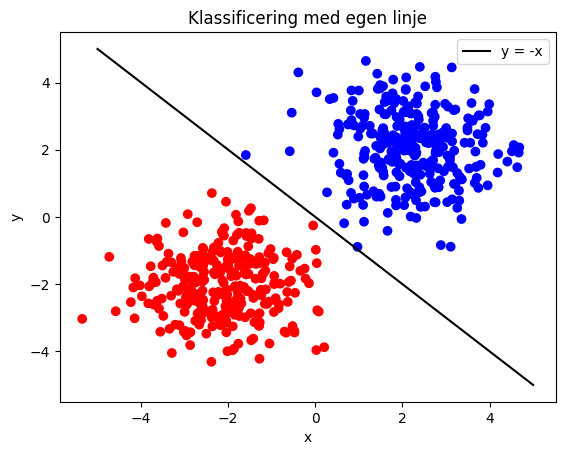

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Läs in data
data = pd.read_csv("unlabelled_data.csv")
data.columns = ["x", "y"]

# Plotta oklassificerad data
plt.scatter(data["x"], data["y"], color="gray")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oklassificerad data")
plt.show()

# Definiera linjer
def f_line(x): 
    return -0.489 * x

def g_line(x): 
    return -2 * x + 0.16

def h_line(x): 
    return 800 * x - 120

def my_line(x): 
    return -1 * x + 0   # ändra k och m efter din linje

# Plotta alla linjer
x_vals = np.linspace(-5, 5, 100)
plt.scatter(data["x"], data["y"], color="gray", label="Data")
plt.plot(x_vals, my_line(x_vals), color="black", label="Min linje y = -x")
plt.plot(x_vals, f_line(x_vals), color="green", label="f(x) = -0.489x")
plt.plot(x_vals, g_line(x_vals), color="yellow", label="g(x) = -2x + 0.16")
plt.plot(x_vals, h_line(x_vals), color="purple", label="h(x) = 800x - 120")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Olika linjära klassificeringsgränser")
plt.show()

# Klassificeringsfunktion
def classify(data, func):
    return data.apply(lambda row: 1 if row["y"] >= func(row["x"]) else 0, axis=1)

# Klassificera data för alla linjer
data["my_label"] = classify(data, my_line)
data["f_label"] = classify(data, f_line)
data["g_label"] = classify(data, g_line)
data["h_label"] = classify(data, h_line)

# Visa första raderna
print(data.head())

# Jämför klassificeringarna
print("Skillnader mellan min linje och f_line:", sum(data["my_label"] != data["f_label"]))
print("Skillnader mellan min linje och g_line:", sum(data["my_label"] != data["g_label"]))
print("Skillnader mellan min linje och h_line:", sum(data["my_label"] != data["h_label"]))

# Plotta klassificering med egen linje
colors = data["my_label"].map({0: "red", 1: "blue"})
plt.scatter(data["x"], data["y"], c=colors)
plt.plot(x_vals, my_line(x_vals), color="black", label="y = -x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Klassificering med egen linje")
plt.legend()
plt.show()


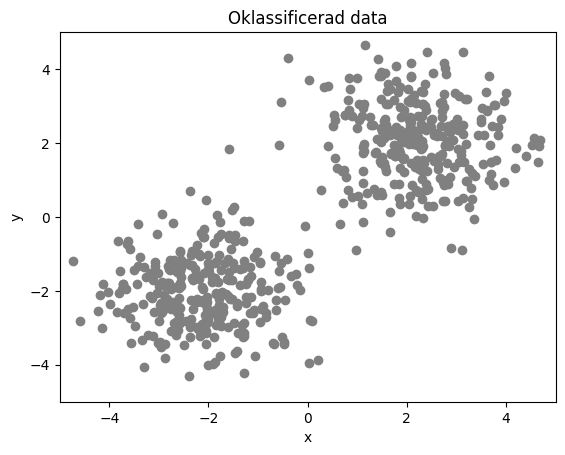

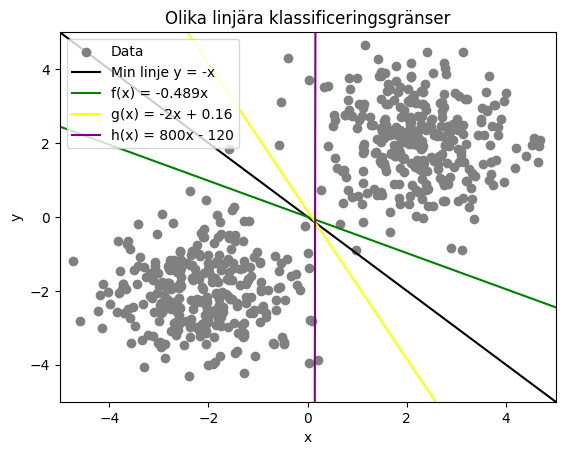

          x         y  my_label  f_label  g_label  h_label
0  2.090362  2.562490         1        1        1        0
1 -2.928221  0.082387         0        0        0        1
2  2.895800  2.435458         1        1        1        0
3 -2.358964 -1.038429         0        0        0        1
4 -2.932220 -1.766313         0        0        0        1
Skillnader mellan min linje och f_line: 1
Skillnader mellan min linje och g_line: 1
Skillnader mellan min linje och h_line: 593


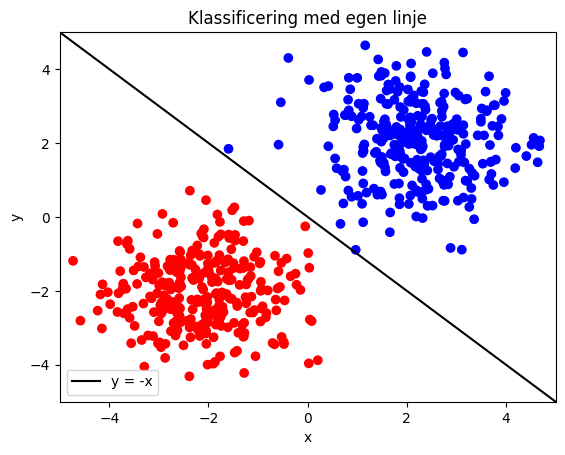

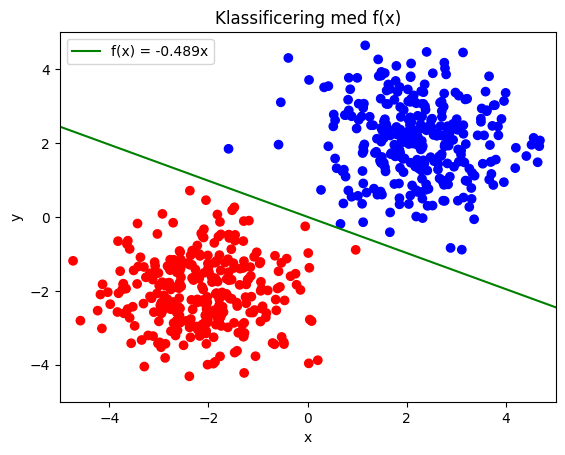

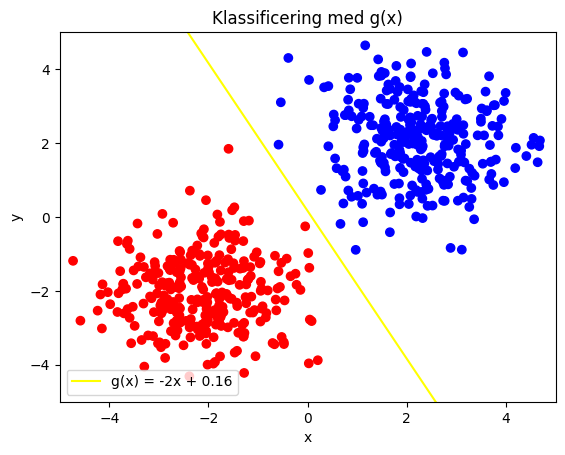

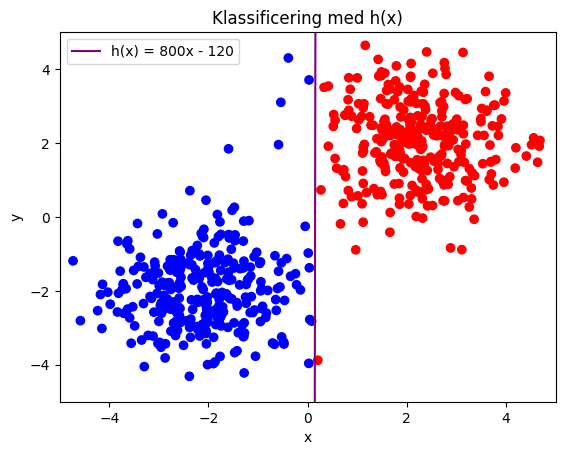

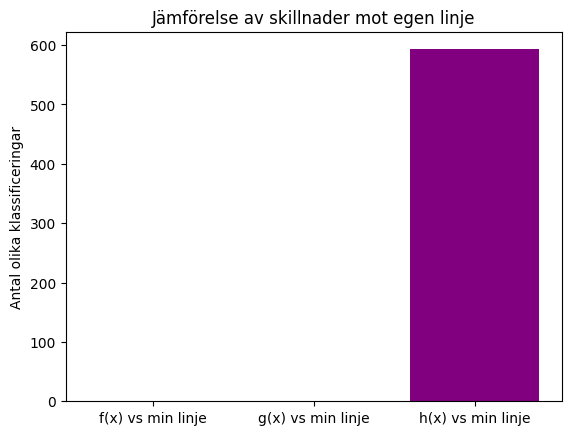

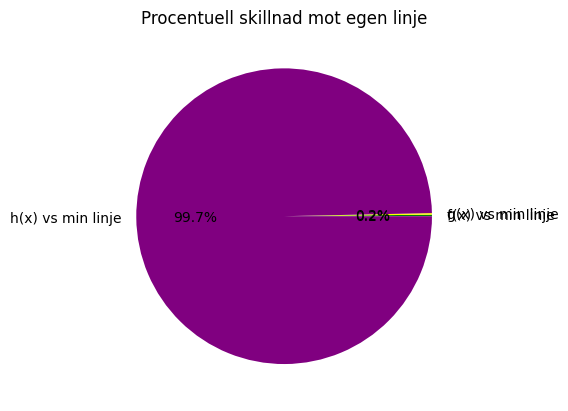

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Läs in data
data = pd.read_csv("unlabelled_data.csv")
data.columns = ["x", "y"]

# Plotta oklassificerad data
plt.scatter(data["x"], data["y"], color="gray")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oklassificerad data")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Definiera linjer
def f_line(x): 
    return -0.489 * x

def g_line(x): 
    return -2 * x + 0.16

def h_line(x): 
    return 800 * x - 120

def my_line(x): 
    return -1 * x + 0   # ändra k och m efter din linje

# Plotta alla linjer
x_vals = np.linspace(-5, 5, 100)
plt.scatter(data["x"], data["y"], color="gray", label="Data")
plt.plot(x_vals, my_line(x_vals), color="black", label="Min linje y = -x")
plt.plot(x_vals, f_line(x_vals), color="green", label="f(x) = -0.489x")
plt.plot(x_vals, g_line(x_vals), color="yellow", label="g(x) = -2x + 0.16")
plt.plot(x_vals, h_line(x_vals), color="purple", label="h(x) = 800x - 120")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Olika linjära klassificeringsgränser")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Klassificeringsfunktion
def classify(data, func):
    return data.apply(lambda row: 1 if row["y"] >= func(row["x"]) else 0, axis=1)

# Klassificera data för alla linjer
data["my_label"] = classify(data, my_line)
data["f_label"] = classify(data, f_line)
data["g_label"] = classify(data, g_line)
data["h_label"] = classify(data, h_line)

# Visa första raderna
print(data.head())

# Jämför klassificeringarna
diff_f = sum(data["my_label"] != data["f_label"])
diff_g = sum(data["my_label"] != data["g_label"])
diff_h = sum(data["my_label"] != data["h_label"])

print("Skillnader mellan min linje och f_line:", diff_f)
print("Skillnader mellan min linje och g_line:", diff_g)
print("Skillnader mellan min linje och h_line:", diff_h)

# Plotta klassificering med egen linje
colors = data["my_label"].map({0: "red", 1: "blue"})
plt.scatter(data["x"], data["y"], c=colors)
plt.plot(x_vals, my_line(x_vals), color="black", label="y = -x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Klassificering med egen linje")
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Plotta klassificering med f_line
colors = data["f_label"].map({0: "red", 1: "blue"})
plt.scatter(data["x"], data["y"], c=colors)
plt.plot(x_vals, f_line(x_vals), color="green", label="f(x) = -0.489x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Klassificering med f(x)")
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Plotta klassificering med g_line
colors = data["g_label"].map({0: "red", 1: "blue"})
plt.scatter(data["x"], data["y"], c=colors)
plt.plot(x_vals, g_line(x_vals), color="yellow", label="g(x) = -2x + 0.16")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Klassificering med g(x)")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.show()

# Plotta klassificering med h_line
colors = data["h_label"].map({0: "red", 1: "blue"})
plt.scatter(data["x"], data["y"], c=colors)
plt.plot(x_vals, h_line(x_vals), color="purple", label="h(x) = 800x - 120")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Klassificering med h(x)")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.show()

# ----------------------------
# Jämförelse av effektivitet
# ----------------------------

# Vi jämför hur många punkter som skiljer sig från din linje
diffs = {
    "f(x) vs min linje": diff_f,
    "g(x) vs min linje": diff_g,
    "h(x) vs min linje": diff_h
}

# Bar chart
plt.bar(diffs.keys(), diffs.values(), color=["green", "yellow", "purple"])
plt.ylabel("Antal olika klassificeringar")
plt.title("Jämförelse av skillnader mot egen linje")
plt.show()

# Alternativt: Pie chart för att visa fördelningen
plt.pie(diffs.values(), labels=diffs.keys(), autopct='%1.1f%%', colors=["green", "yellow", "purple"])
plt.title("Procentuell skillnad mot egen linje")
plt.show()


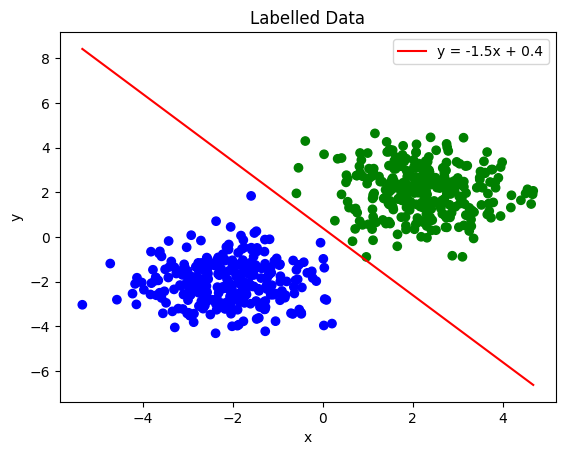

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Läser in data
data = pd.read_csv("unlabelled_data.csv", names=["x", "y"])

# Extraherar x- och y-koordinater
x = data["x"].values
y = data["y"].values

# Min valda linje
k = -1.5
m = 0.4

# Definera linjens ekvation y = kx + m
def line(x):
    return k * x + m

# Klassificerar punkterna 1 om ovanför linjen, annars 0
def classify_point(x, y):
    return y > line(x)

# Klassificerar alla punkter och lägger en label-kolumn i datan, sparar sedan resultat till nytt CSV
data["label"] = [int(classify_point(x[i], y[i])) for i in range(len(x))]
data.to_csv("unlabelled_data.csv", index = False, header = False)

# Färgsättning, visualiserar data och linje
colors = ["green" if c == 1 else "blue" for c in data["label"]]
x_vals = np.array([x.min(), x.max()])
y_vals = line(x_vals)
plt.scatter(data["x"], data["y"], c = colors)
plt.plot(x_vals, y_vals, color="red", label=f"y = {k}x + {m}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Labelled Data")
plt.legend()
plt.show()